**МУРМАНСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ**

**Институт арктических технологий**

**Кафедра цифровых технологии, математики и экономики**

**Дисциплина:** Компьютерное моделирование

**Лабораторная работа №3**

**Тема**: Определение числи Пи методом пристрелки

**Выполнил**: студент группы ИВТб18о-1, Корнилов Владислав Валерьевич

**Дата защиты**: 20.12.2021

**Задание**:

1. Сгенерировать изображение для вычисления числа Пи методом пристрелки.
2. С помощью генератора случайных чисел бросать точки на изображение и определить число Пи.
3. Провести эксперимент при количестве точек равном: 10, 100, 1000, 10000, 100000, 1000000. 

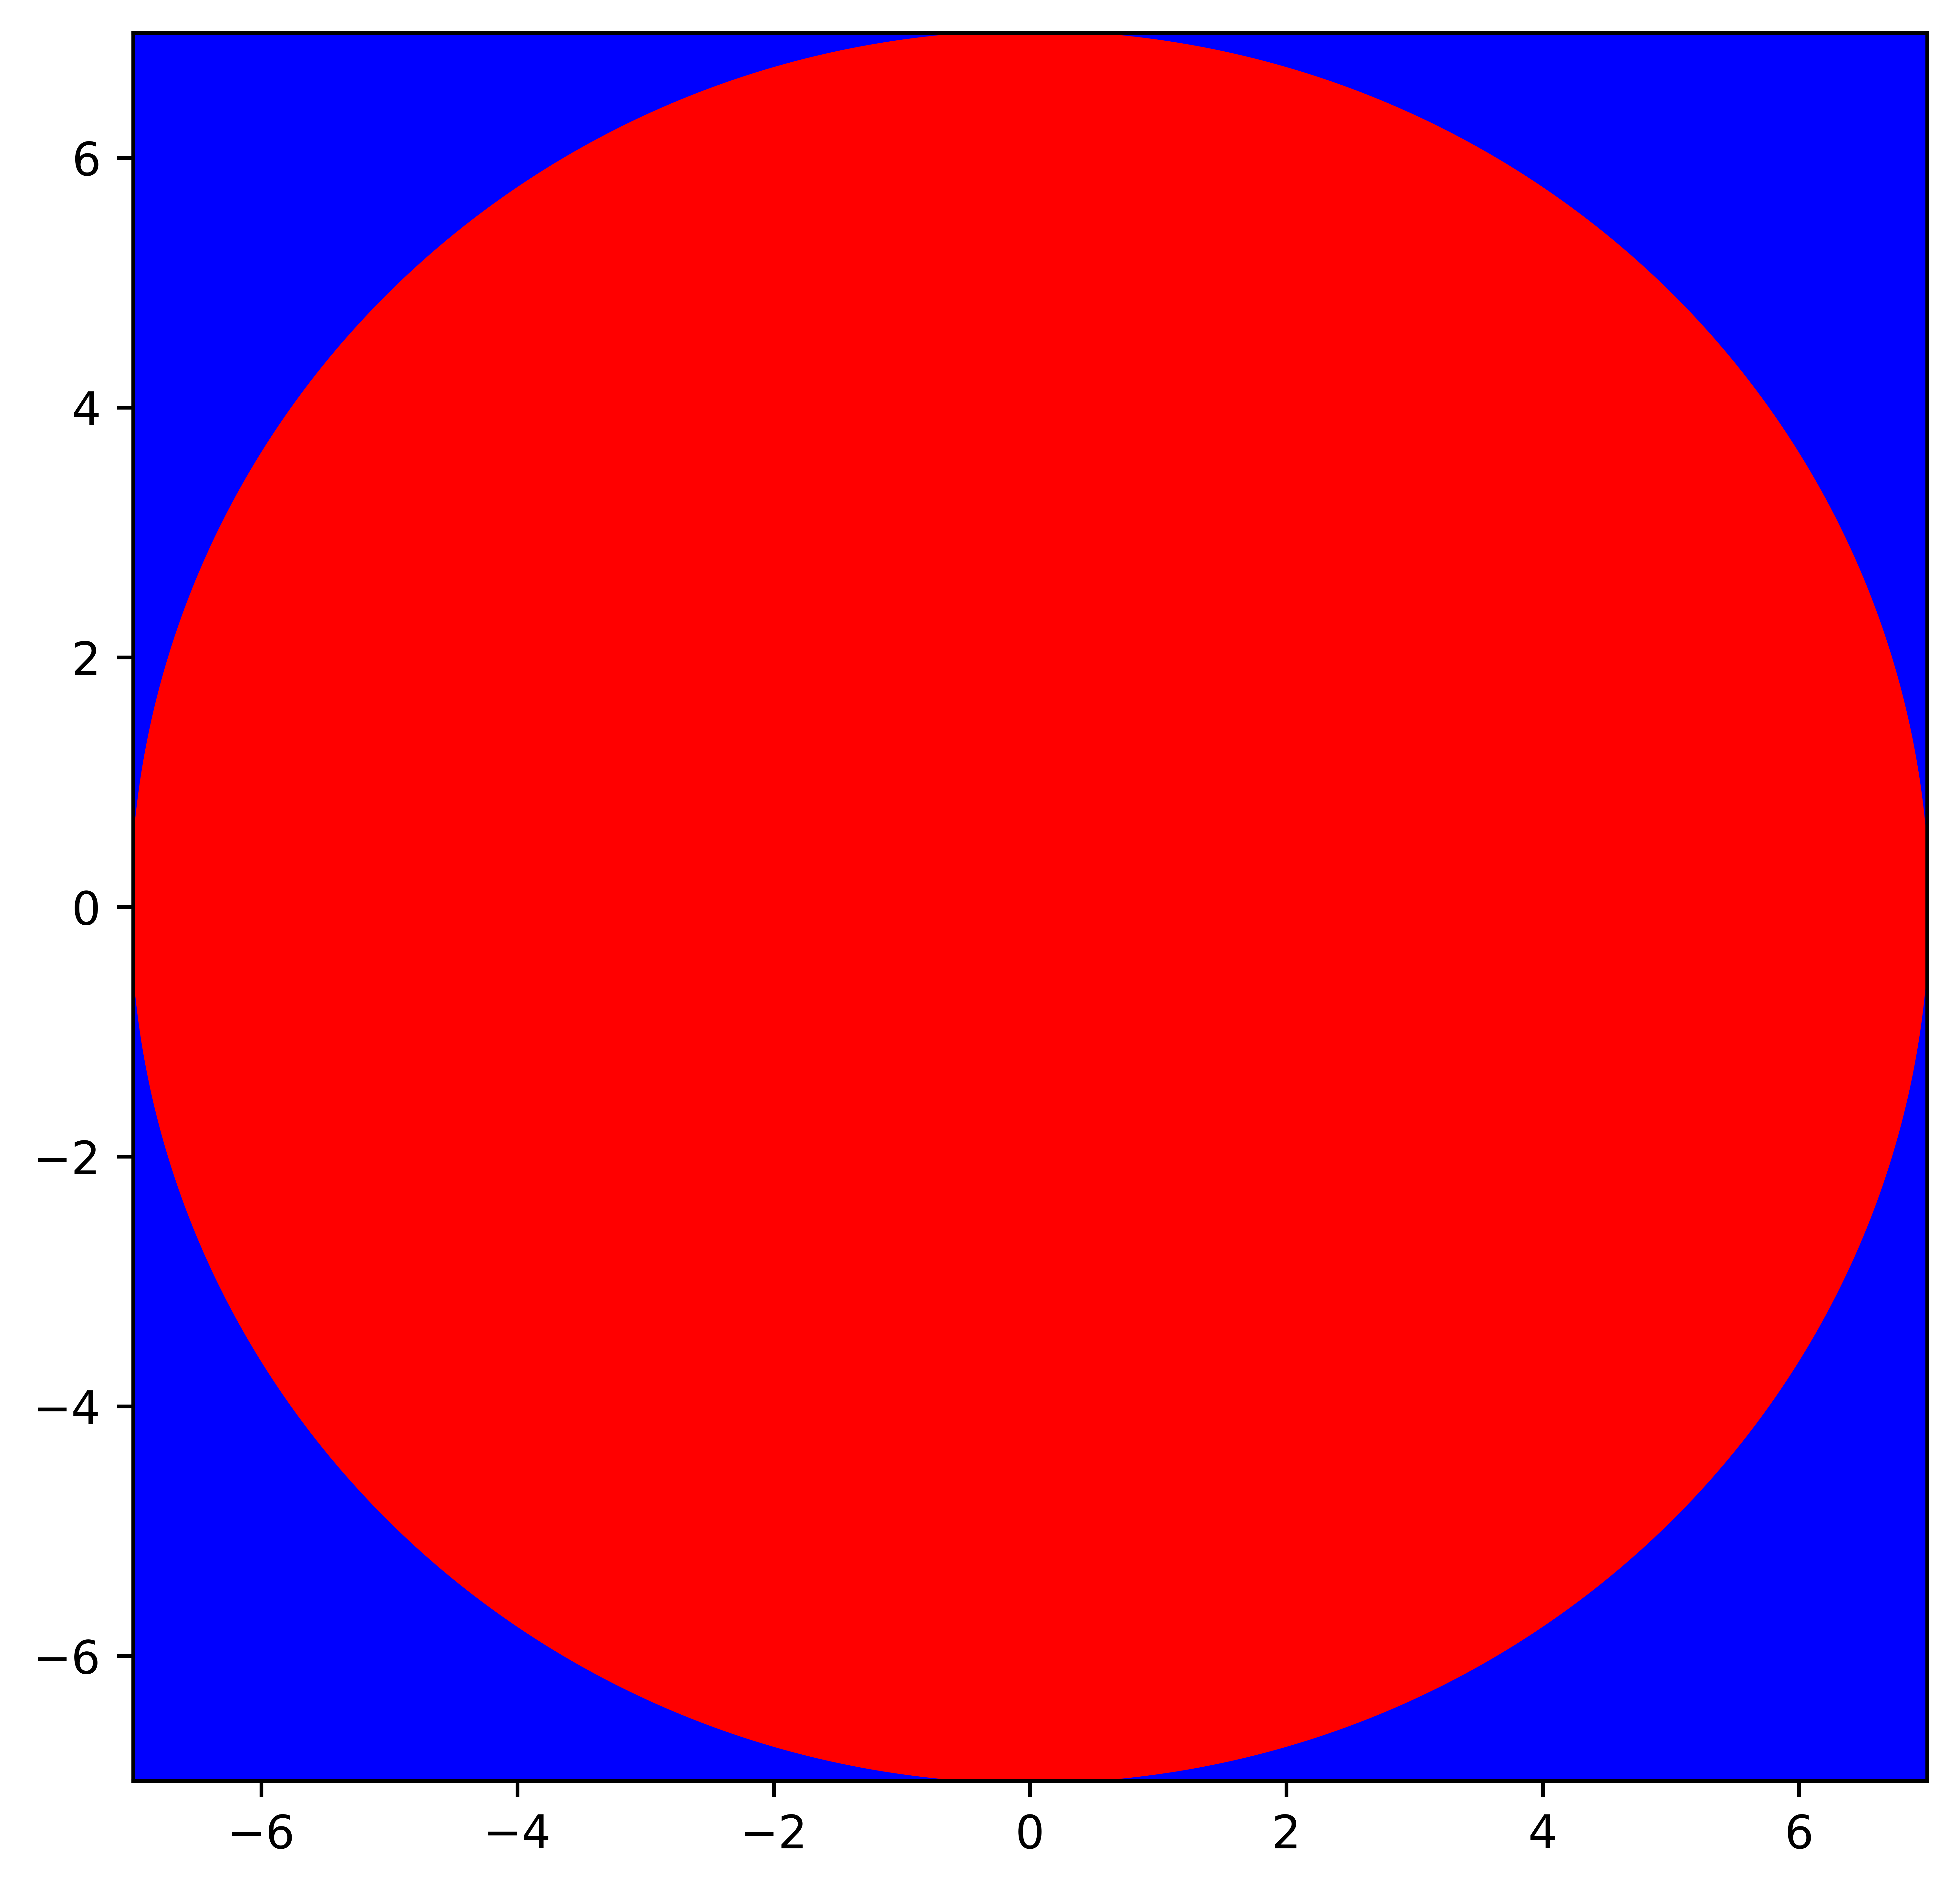

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
fig.dpi = 1024
radius = 7
border = 7
ax.set(xlim = (-border, border), ylim = (-border, border))

square = plt.Rectangle((-radius, -radius), 2 * radius, 2 * radius, facecolor = 'b')
circle = plt.Circle((0, 0), radius, color='r')
ax.add_patch(square)
ax.add_patch(circle)

In [61]:
def testCircle(x, y, r):
    return x**2 + y**2 <= r**2



In [72]:
from PIL import Image
import numpy as np

im = Image.open(r'output.png') 
data = np.array(im)
height = len(data)
width = len(data[0])
print(height, width)

5855 6069


In [66]:
import random
red = (255, 0, 0, 255)
redCnt = 0
blue = (0, 0, 255, 255)
blueCnt = 0

for i in range(10000000):
    x = random.uniform(-radius, radius)
    y = random.uniform(-radius, radius)
    if testCircle(x, y, radius):
        redCnt += 1
    else:
        blueCnt += 1
pi = 4 * redCnt / (redCnt + blueCnt)
print(pi)

3.1418588


In [56]:
def calcPi(iterations):
    red = (255, 0, 0, 255)
    redCnt = 0
    blue = (0, 0, 255, 255)
    blueCnt = 0

    for i in range(iterations):
        foundPix = False
        while not foundPix:
            y = randrange(height)
            x = randrange(width)
            foundPix = True
            col = data[y][x]
            #print(col)
            if np.array_equal(col, red):
                redCnt += 1
            elif np.array_equal(col, blue):
                blueCnt += 1
            else:
                foundPix = False
    # print("red = ", redCnt, " blue = ", blueCnt)
    return 4 * redCnt / (redCnt + blueCnt)

In [73]:
from random import randrange
from prettytable import PrettyTable
import math

def calcError(piList):
    error = []
    for pi in piList:
        diff = pi / math.pi * 100 - 100
        error.append(diff)
    return error

iterations = [10, 100, 1000, 10000, 100000, 100000]
def calcPiList():
    list = []
    for iter in iterations:
        pi = calcPi(iter)
        list.append(pi)
    return list


piList = calcPiList()
table = PrettyTable()
table.field_names = ["Iterations", "PI", "Error, %"]
table.add_column("Iterations", iterations)
table.add_column("PI", piList)
table.add_column("Error, %", calcError(piList))

print(table)


+------------+---------+---------------------+
| Iterations |    PI   |       Error, %      |
+------------+---------+---------------------+
|     10     |   4.0   |  27.32395447351628  |
|    100     |   3.08  | -1.9605550553924616 |
|    1000    |   3.2   |  1.8591635788130105 |
|   10000    |  3.156  |  0.4586000796043379 |
|   100000   | 3.16784 |  0.835478984845949  |
|   100000   | 3.17136 |  0.9475240647826411 |
+------------+---------+---------------------+


In [58]:
cnt = 10
sumPi = [0] * len(iterations)
for i in range(cnt):
    piList = calcPiList()
    for j in range(len(piList)):
        sumPi[j] += piList[j]

for i in range(len(sumPi)):
    sumPi[i] /= cnt

table = PrettyTable()
table.field_names = ["Iterations", "PI", "Error, %"]
table.add_column("Iterations", iterations)
table.add_column("PI", sumPi)
table.add_column("Error, %", calcError(sumPi))

print(table)

+------------+--------------------+---------------------+
| Iterations |         PI         |       Error, %      |
+------------+--------------------+---------------------+
|     10     |        3.04        | -3.2337946001276237 |
|    100     |       3.124        | -0.5599915561837889 |
|    1000    |       3.1932       |  1.6427128562080497 |
|   10000    |       3.1756       |  1.082487456524575  |
|   100000   | 3.1691040000000004 |  0.8757133544595916 |
|  1000000   | 3.1716716000000003 |  0.9574426008361456 |
+------------+--------------------+---------------------+
